# Sharpe Ratio Project for DIG
#### In this project we aim to answer the question of how our investment decisions affect our Sharpe Ratio historically
We will address this question by utilizing data provided by the DIG purchase history, the yahoo finance data base, and the 3 month Treasury Bill Rates. What does this project and question mean? 

    Essentially we are going to look at each time we changed the DIG portfolio over its lifetime, then find whatever the 5yr Sharpe Ratio is of that specific portfolio at that specific time, then we will repeat this for all dates we changed the portfolio. So at the end we will have a series of Sharpe Ratios, and see how they have increased or decreased over time. 
    
Once we assess this rough estimation we will dive into a more focused rendition of the project, utilizing data we have pulled in excel files outside of this project. We will investigate the overall compositon of the portfolio using the daily values of returns, weightings, and total portfolio values. 

To provide an overview, we will:

### 1. 
#### Gather necessary Data for purchase history, t-bill rates, and the stock prices of each holding from 5 years before the inception of the portfolio. We have already calculated the weights of each stock at each time in an excel file which is available upon request.

### 2. 
#### Take the pricing data and use it to find the 5-year historical Sharpe ratio of the portfolio at each time we change the portfolio.

### 3. 
#### Consider the Sharpe Ratio changes with time specific t-bill rates, constant t-bill rates, and then a t-bill rate of 0. This is more so to see the impact of rates on the metric (higher rates and low returns = low or even negative ratio).

### 4. 
####  Then we will work to find the returns of the portfolio and attempt to find the sharpe ratio using the data specific to the portfolio. 

### 6.
#### Use the estimated DIG Daily Values we calculated in Excel to analyze the composition of the portfolio

### 7. 
#### Statistical Analysis, find the correlation between our returns and the S&P 500 as well as correlation of the Rolling Sharpe Ratio

### 8. 
#### Calculate the estimated rolling Sharpe Ratio for DIG and compare it to the rolling Sharpe Ratio for the S&P 500

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
weights = pd.read_csv("Weights.csv")
rates = pd.read_csv("DTB3.csv")

In [3]:
weights = weights.drop(columns = {'Unnamed: 0'})

In [4]:
rates['Date'] = pd.to_datetime(rates['DATE']).dt.strftime('%m/%d/%Y')
rates=rates.drop(columns = {'DATE'})
weights = pd.merge(weights, rates, on='Date', how='inner')
weights.rename(columns={'DTB3': 'Rate'}, inplace=True)

In [5]:
weights['Rate'] = pd.to_numeric(weights['Rate'])

In [6]:
weights.tail()

,Date,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,...,SCHW,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW,Rate
28,11/17/2023,0.038834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023617,0.101274,0.414500,0.083638,0.000000,0.000000,0.000000,0.000000,0.000000,5.25
29,11/30/2023,0.038989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025121,0.102182,0.413283,0.083712,0.023405,0.023405,0.000000,0.000000,0.000000,5.25
30,12/28/2023,0.039649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027126,0.100410,0.410876,0.083345,0.022291,0.021457,0.000000,0.000000,0.000000,5.25
31,03/14/2024,0.034204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021547,0.087682,0.368301,0.073151,0.000000,0.018054,0.028165,0.028165,0.035207,5.25
32,04/30/2024,0.034610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024309,0.085418,0.363745,0.073151,0.000000,0.019400,0.023847,0.028165,0.034360,5.25


In [7]:
tickers = weights.columns.tolist()
tickers = tickers[1:-1]

In [8]:
### now we will get the log returns for all the holdings 
start_date = (pd.to_datetime(weights['Date'][0]) - pd.DateOffset(years = 5))
end_date = pd.to_datetime(weights['Date'].iloc[-1])

log_returns = pd.DataFrame(columns = tickers)

for i in tickers:
    holding = yf.Ticker(i)
    holding_data = holding.history(interval='1d', start=start_date, end=end_date, auto_adjust = True)
    holding_close = holding_data['Close']
    log_returns[i] = np.log(holding_close).diff().dropna()


    
    
log_returns = log_returns.fillna(0)

In [9]:
log_returns.reset_index(inplace=True)

log_returns['Date'] = log_returns['Date'].dt.strftime('%m/%d/%Y')

In [10]:
log_returns.tail()

,Date,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,...,PSA,SCHW,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW
2045,04/23/2024,0.008841,0.021968,0.017443,0.011213,0.008211,0.009082,0.023433,0.024128,0.016927,...,0.002979,0.012978,0.006618,0.012534,0.006726,0.011834,0.008112,0.026846,0.026855,0.026545
2046,04/24/2024,0.001415,-0.001673,-0.001800,0.000219,0.003122,0.003828,0.026507,-0.003487,-0.000784,...,-0.000191,-0.000532,-0.001320,-0.000732,0.000695,0.004166,-0.005095,-0.018604,-0.017514,0.024956
2047,04/25/2024,-0.002092,-0.003114,-0.003775,-0.006634,0.003112,-0.005748,-0.054542,0.013224,-0.005052,...,-0.013401,-0.003998,0.000000,-0.004142,-0.001518,0.043268,0.008088,0.005031,0.007646,-0.016196
2048,04/26/2024,0.000493,0.007886,0.008310,0.003734,0.011407,0.000823,0.032882,0.023397,0.019284,...,-0.003679,0.001334,0.000000,0.009959,-0.000570,0.005054,0.011625,-0.009979,0.039663,0.036253
2049,04/29/2024,0.006933,0.008061,0.007028,0.006337,0.009876,0.011182,-0.001237,0.017633,0.001765,...,0.019975,-0.005751,0.001584,0.003483,0.003856,0.006819,0.018576,0.010459,0.017194,-0.004373


## 2 
Now that we have the historical returns of the stocks in our portfolio, we need to define our function to get the historical Sharpe Ratios at each point in time. We recall the formula for the Sharpe Ratio : $$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$$ 
$ \text{Return of Portfolio =  } R_p$

$ \text{Risk Free Rate of Return =  } R_f$

$ \text{Standard Deviation of Portfolio =   } \sigma_p$


Where $R_p$ is the mean log return of the portfolio over 5 years, $R_f$ is the designated risk free rate of return, and $\sigma_p$ is the standard deviation of the portfolio in that five year interval.

The biggest question I personally had was how to find the $\sigma_p$ or the volatility of the portfolio. In the code below I take the approach of finding the covariance matrix of the matrix of log returns of the holdings. After to find the single value of the portfolio volatility I set up the following:

$$ \sigma_p^2 =\begin{bmatrix} \omega_1 \\ \omega_2 \\ . \\ . \\ \omega_n \end{bmatrix} * 
[ \begin{bmatrix}  
\sigma_{1,1} & \sigma_{1,2} & ... & \sigma_{1,j} \\ 
\sigma_{2,1} & \sigma_{2,2} & ... & \sigma_{2,j} \\
... & ... & ... & ... \\
\sigma{i,1} & ... & ... & \sigma{i,j} 
\end{bmatrix} * 
\begin{bmatrix} \omega_1 & \omega_2 & ...& \omega_n \end{bmatrix} ]
$$

Where $\omega_n$ is the weighting of a holding at each time point and $\sigma_{i,j}$ is the covariance between holding i and j, note that along the diagonal of the matrix where $i = j$ it is simply the variance of the holding.

Where the *np.dot()* takes the product of a row of the covariance matrix and the weighting matrix, then repeating this for all rows of the covariance matrix, then summing all the columns.

In [11]:
def get_sharpes(weights,log_returns, rf_rate = None):
    weight_raw = weights.drop(columns = {'Date', 'Rate'}) # this is our raw weighting 
    tickers = weights.columns.tolist()
    tickers = tickers[1:-1]
    sharpes = []
    rets = []
    risks = []
    for i in weights.index:
        if rf_rate == None:
            rf_rate = weights['Rate'][i] / 100
        else: 
            rf_rate = rf_rate
            
        end_date = dt.datetime.strptime(weights['Date'][i], "%m/%d/%Y")
        start_date = end_date - dt.timedelta(days=365 * 5)
    
        log_rets = log_returns[(pd.to_datetime(log_returns['Date']) >= start_date) & 
                               (pd.to_datetime(log_returns['Date']) <= end_date)]


        mean_rets = log_rets.mean(numeric_only = True, skipna = True)
        cov_mat = log_rets.cov() * 252
        port_rets = ((weight_raw.iloc[i]* mean_rets).sum()+1)**252 - 1
        port_risk = np.sqrt(np.dot(weight_raw.iloc[i].T, np.dot(cov_mat, weight_raw.iloc[i])))
        
        # what the port_risk line does is that it takes cov_mat and weight_raw.iloc[i] and multiples each line of 
        # cov_mat with weight_raw.iloc[i] and sums it and then returns a vector with equal number of rows as matrix
        # this result vector is each volatility of the holding, to get this to a single value for the portfolio 
        # we must take the dot prod of this result with the transposed weighting vector. This gives the volatility
        # for the portfolio, so the square root yields the stdev

        sharpes.append((port_rets - rf_rate) / port_risk)
        rets.append(port_rets)
        risks.append(port_risk)
    
    complete = pd.DataFrame({'Date' : weights['Date'],
                            '5yr Log Returns' : rets,
                            '5yr Standard Deviation': risks,
                            '5yr Historical Sharpe Ratio': sharpes})
    
    return complete
    

In [12]:
full_data = get_sharpes(weights, log_returns)

In [13]:
full_data

,Date,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
0,03/05/2021,0.145946,0.196417,0.741006
1,03/25/2021,0.146213,0.196745,0.741126
2,05/20/2021,0.153941,0.197542,0.777257
3,06/18/2021,0.162415,0.199403,0.812500
4,06/28/2021,0.202089,0.204128,0.988048
5,11/18/2021,0.195009,0.203704,0.955349
6,12/14/2021,0.194581,0.192897,1.006659
7,12/15/2021,0.208007,0.194141,1.069366
8,02/18/2022,0.172385,0.201249,0.854588
9,03/11/2022,0.162318,0.202193,0.800808


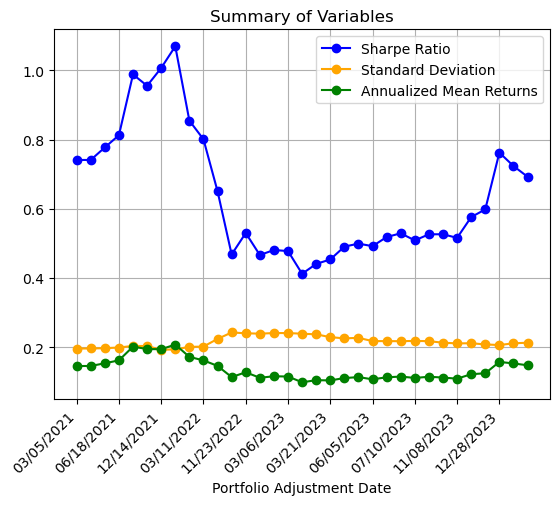

In [14]:
selected_dates = full_data['Date'][::3]
plt.plot(full_data['Date'], 
         full_data['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-', color = "blue", label = 'Sharpe Ratio')

plt.plot(full_data['Date'], 
        full_data['5yr Standard Deviation'], 
         marker = 'o', linestyle = '-', label = 'Standard Deviation', color = 'orange')
plt.plot(full_data['Date'], 
        full_data['5yr Log Returns'], 
         marker = 'o', linestyle = '-', color = 'green', label = 'Annualized Mean Returns')
plt.xlabel('Portfolio Adjustment Date')
plt.title("Summary of Variables")
plt.legend()
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

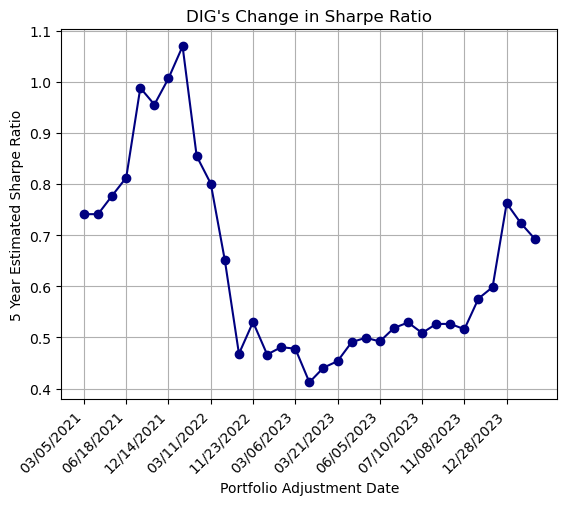

In [15]:
selected_dates = full_data['Date'][::3]
plt.plot(full_data['Date'], 
         full_data['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-', color = "navy")

plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in Sharpe Ratio")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

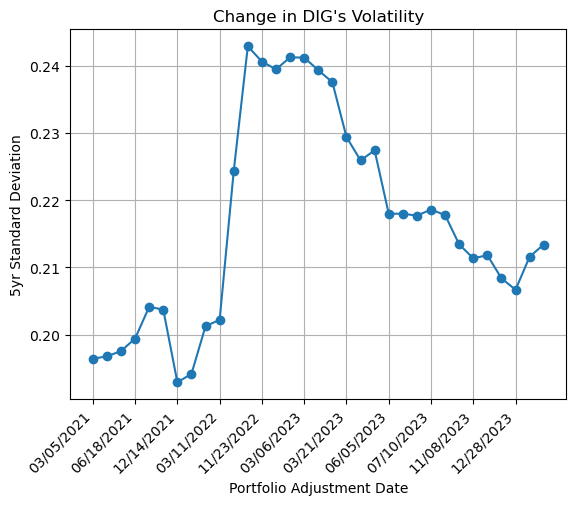

In [16]:
selected_dates = full_data['Date'][::3]
plt.plot(full_data['Date'], 
        full_data['5yr Standard Deviation'], 
         marker = 'o', linestyle = '-')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5yr Standard Deviation')
plt.title("Change in DIG's Volatility")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')

plt.show()

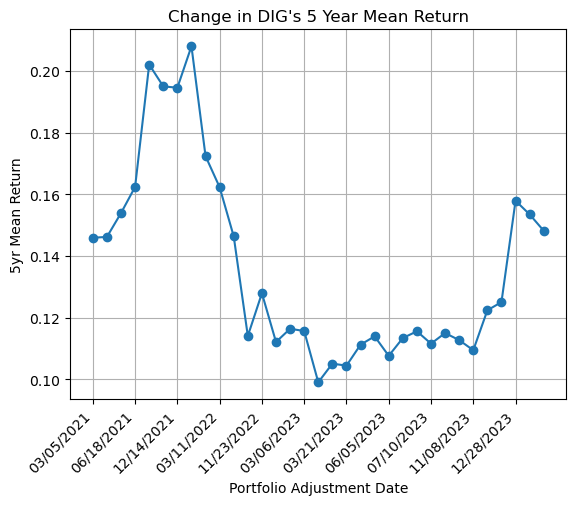

In [17]:
selected_dates = full_data['Date'][::3]
plt.plot(full_data['Date'], 
        full_data['5yr Log Returns'], 
         marker = 'o', linestyle = '-')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5yr Mean Return')
plt.title("Change in DIG's 5 Year Mean Return")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')

plt.show()

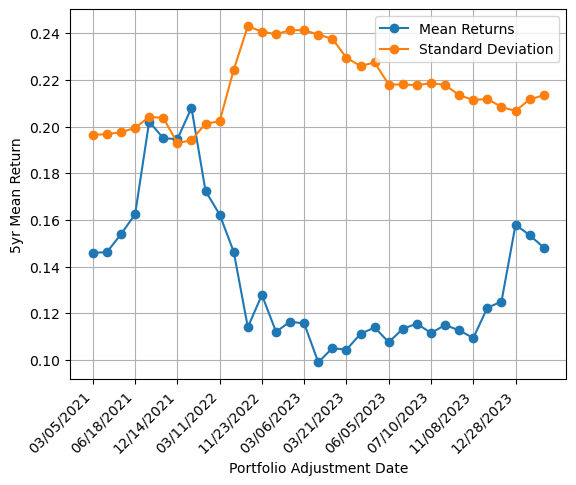

In [18]:
selected_dates = full_data['Date'][::3]
plt.plot(full_data['Date'], 
        full_data['5yr Log Returns'], 
         marker = 'o', linestyle = '-', label = 'Mean Returns')
plt.plot(full_data['Date'], 
        full_data['5yr Standard Deviation'], 
         marker = 'o', linestyle = '-', label = 'Standard Deviation')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5yr Mean Return')
plt.title("")
plt.legend()
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')

plt.show()

## 3 Assessing constant vs fluctuating Risk Free Rate (using the 3 Month T-Bills)
We notice a sharp decline in the sharpe ratios from early 2022 to late 2022. This could be due to the rising interest rates we experienced in that time which caused the risk free rate to rise substantially. Let's consider the cases where we have constant risk free rates. Case 1 will be the average risk free rate over the time periods, and Case 2 will be a risk free rate of 0 (a simple Sharpe Ratio)

In [19]:
# Case 1

mean_rf_rate = (weights['Rate'].mean())/100
mean_rf = get_sharpes(weights, log_returns, rf_rate = mean_rf_rate)

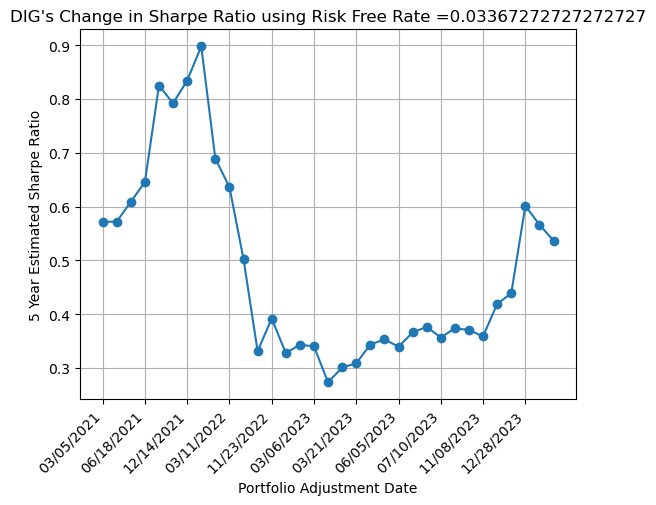

In [20]:
selected_dates = mean_rf['Date'][::3]
plt.plot(mean_rf['Date'], 
         mean_rf['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-')

plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in Sharpe Ratio using Risk Free Rate ="+str(mean_rf_rate))
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

In [21]:
## Case 2 

null_rf = get_sharpes(weights, log_returns, rf_rate = 0.0)


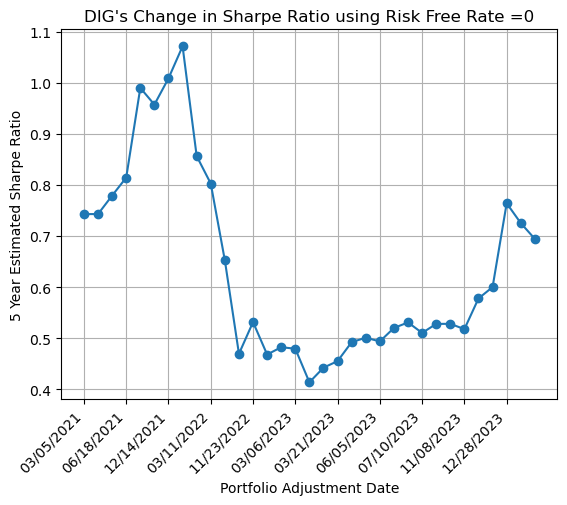

In [22]:
selected_dates = null_rf['Date'][::3]
plt.plot(null_rf['Date'], 
         null_rf['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-')

plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in Sharpe Ratio using Risk Free Rate ="+str(0))
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

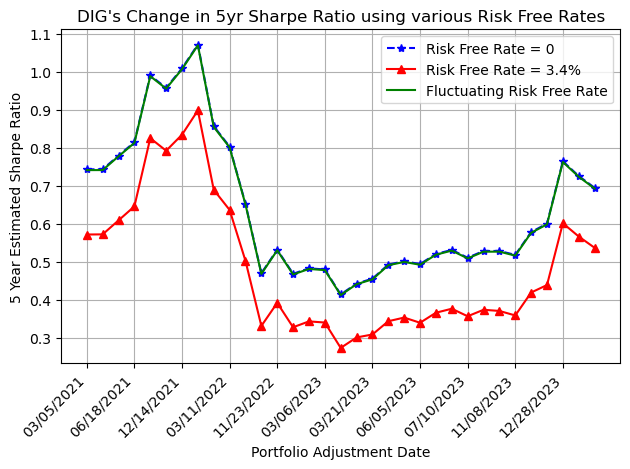

In [23]:
selected_dates = null_rf['Date'][::3]
plt.plot(null_rf['Date'], 
         null_rf['5yr Historical Sharpe Ratio'], 
         marker = '*', linestyle='--', color = 'blue', label = 'Risk Free Rate = 0')

plt.plot(mean_rf['Date'], 
         mean_rf['5yr Historical Sharpe Ratio'], 
         marker='^', linestyle='-', color = 'red', label = 'Risk Free Rate = 3.4%')
plt.plot(full_data['Date'], 
         full_data['5yr Historical Sharpe Ratio'], 
          linestyle='-', color = 'green', label = 'Fluctuating Risk Free Rate')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in 5yr Sharpe Ratio using various Risk Free Rates")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
full_data

,Date,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
0,03/05/2021,0.145946,0.196417,0.741006
1,03/25/2021,0.146213,0.196745,0.741126
2,05/20/2021,0.153941,0.197542,0.777257
3,06/18/2021,0.162415,0.199403,0.812500
4,06/28/2021,0.202089,0.204128,0.988048
5,11/18/2021,0.195009,0.203704,0.955349
6,12/14/2021,0.194581,0.192897,1.006659
7,12/15/2021,0.208007,0.194141,1.069366
8,02/18/2022,0.172385,0.201249,0.854588
9,03/11/2022,0.162318,0.202193,0.800808


#### We see that whether we have alternating, constant, or a 0 Risk Free rate of return, the path of the Sharpe Ratio stays relatively the same. This can be attributted to the rise in volatility and the fall in mean returns that the DIG portfolio had experienced over this time period. I think the thing to highlight from these findings is that we have been consistently rising since late 2023 as the market has propelled us with higher returns. 

#### We will explore more in depth the composition of the DIG portfolio during this time so we can hopefully identify the cause of the downtrend

### 4 Now let's look at DIG's own portfolio returns and see if we can find the Sharpe Ratio using the real data

Note that this file is using the returns calculated above from only the transaction history, we do not use the estimation for Daily Values that we will use later in the project

In [25]:
def get_DIG_rets(weights, log_returns):
    no_rd = weights.drop(columns = {'Date', 'Rate'})
    tickers = weights.columns.tolist()
    tickers = tickers[1:-1]

    rets = [0]
    
    returns = log_returns[
        (pd.to_datetime(log_returns['Date']) >= pd.to_datetime(weights['Date'][0])) 
        & (pd.to_datetime(log_returns['Date']) <= pd.to_datetime(weights['Date'].iloc[-1]))]
    
    for i in range(1,len(no_rd)):
        r = log_returns[
        (pd.to_datetime(log_returns['Date']) >= pd.to_datetime(weights['Date'][i-1])) 
        & (pd.to_datetime(log_returns['Date']) <= pd.to_datetime(weights['Date'].iloc[i]))].sum()[1:]
        
        rets.append(sum(r*no_rd.loc[i-1]))
        
    dig_returns = pd.DataFrame({'Date': weights['Date'], 
                               'DIG Returns' : rets})
    dig_returns['Cumulative Returns'] = dig_returns['DIG Returns'].cumsum()
    dig_returns['Growth of $100'] = dig_returns['Cumulative Returns'].rolling(window=1).sum().apply(lambda x: (100 + (100*x)))
    
    return dig_returns
    

In [26]:
dig = get_DIG_rets(weights,log_returns)

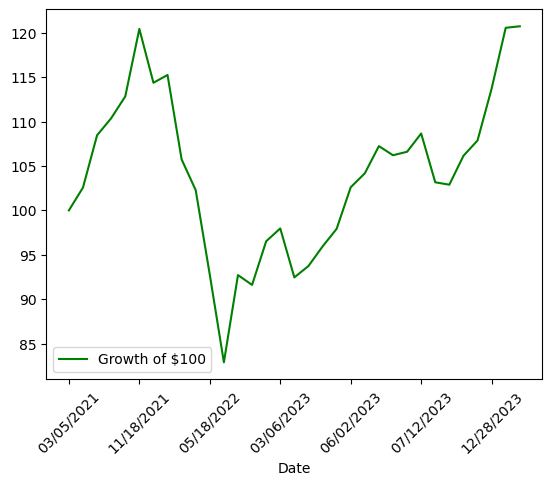

In [27]:
dig.plot(x='Date', y='Growth of $100', kind='line', color='green')
plt.xticks(rotation = 45)
plt.show()

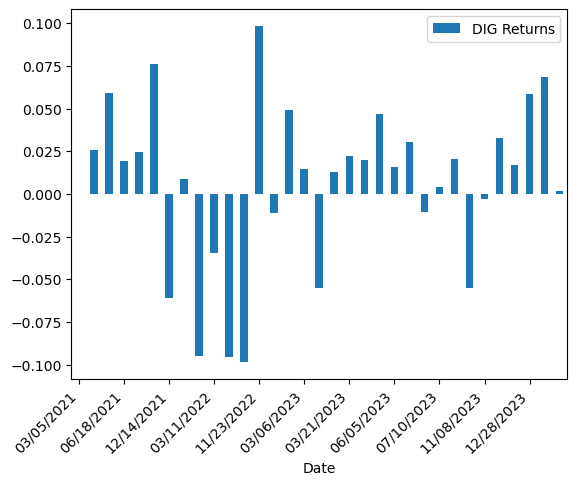

In [28]:
selected_dates = dig['Date'][::3]
dig.plot(x='Date', y='DIG Returns', kind='bar')
plt.xticks(range(0, len(dig['Date']), 3),selected_dates,rotation = 45, ha = 'right')
plt.show()

### What we've done so far is somewhat accurate,
I just found after doing this project (for the second time since I deleted the first file) the montly balances, returns, and dividends for the portfolio over the lifetime of the data. From the data we see that there is a massive decreasing period. My intuition tells me there may be a relationship between the rising Federal Funds rate and our overall returns, so I will plot those below.

In [29]:
fidelity = pd.read_csv("Fidelity Balances2.csv")
one_month_tbill = pd.read_csv('DGS1MO.csv')
fed_rates = pd.read_csv("FEDFUNDS.csv")

In [30]:
fidelity['Beginning Balance'] += fidelity['Deposits']
fidelity = fidelity.drop(columns = {'Deposits'})
fidelity['% Market Returns'] = (fidelity['Market Returns'] / fidelity['Beginning Balance']) *100
fidelity['% Dividend Return'] = (fidelity['Dividends & Interest'] / fidelity['Beginning Balance']) * 100
fidelity['% Monthly Return'] = fidelity['% Market Returns'] + fidelity['% Dividend Return']
fed_rates['DATE'] = pd.to_datetime(fed_rates['DATE']).dt.strftime('%m/%d/%Y')
fed_rates.rename(columns = {'DATE': 'Date',
                           'FEDFUNDS': 'Fed Rate'}, inplace = True)

In [31]:
fidelity['% Monthly Return'].sum()

20.223093270120764

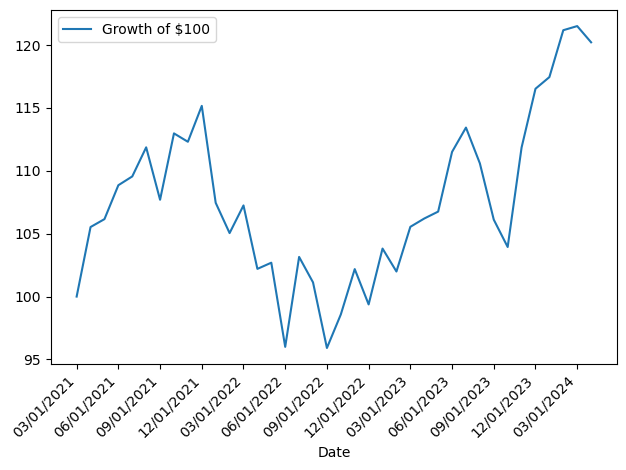

In [32]:
fidelity['Cumulative Return'] = fidelity['% Monthly Return'].cumsum()
fidelity.loc[0,'Cumulative Return'] = 0
fidelity['Growth of $100'] = fidelity['Cumulative Return'].rolling(window=1).sum().apply(lambda x: (100 + x))

selected_dates = fidelity['Date'][::3]
fidelity.plot(x='Date', y='Growth of $100', kind='line')
plt.xticks(range(0, len(fidelity['Date']), 3),selected_dates, rotation = 45, ha = 'right')
plt.tight_layout() 
plt.show()

In [33]:
# what if we want to compare the volatility, mean returns and fed funds rate all on the same graph?
with_fed = pd.merge(fidelity, fed_rates, on = 'Date', how = 'inner')

In [34]:
SP500 = pd.read_csv('SP500.csv')
SP500['DATE'] = pd.to_datetime(SP500['DATE']).dt.strftime('%m/%d/%Y')
SP500.rename(columns = {'DATE':'Date',
                       'SP500_PCH' : 'SP Returns'}, inplace = True)

In [35]:
with_fed2 = pd.merge(with_fed, SP500, on = 'Date', how = 'inner')

<Figure size 2000x1e+06 with 0 Axes>

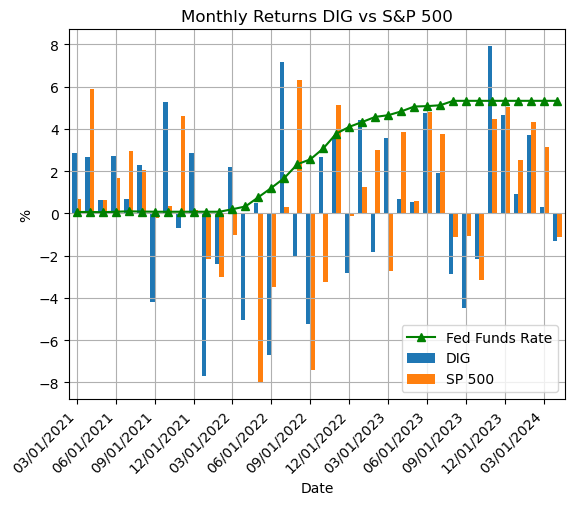

In [36]:
SPvsDIG = pd.DataFrame({'Date': with_fed2['Date'],
                        'DIG': with_fed2['% Monthly Return'],
                        'SP 500': with_fed2['SP Returns']})
SPvsDIG.set_index('Date', inplace=True)
dates = with_fed2['Date'][::3]
plt.figure(figsize=(20,10000))
SPvsDIG.plot(kind = 'bar', label = 'S&P Returns', width = 0.7)
plt.plot(with_fed2['Date'], with_fed2['Fed Rate'], marker='^', 
              linestyle='-', color = 'green', label = 'Fed Funds Rate')
plt.xlabel('Date')
plt.ylabel("%")
plt.title("Monthly Returns DIG vs S&P 500")
plt.xticks(dates, rotation = 45, ha = 'right')
plt.grid(True)
plt.legend()
plt.show()


### Now we can use this to possibly find the true Sharpe Ratio of the Portfolio (or at least get a good approximation)

In [37]:
# we need to annualize the returns and volatility

mean_returns = fidelity['% Monthly Return'].mean() * 12
std_dev = fidelity['% Monthly Return'].std() * (np.sqrt(12)) 
rf_rate = weights['Rate'].mean() # can adjust make whole number since the above are
                                 #I just wanted to use the mean of all the rates we've seen at diff port times
sharpe = (mean_returns - rf_rate) / std_dev

In [38]:
fidelity.iloc[1:,7].mean() * 12

5.626993171379393

In [39]:
print("DIG Sharpe Ratio Appx: ", sharpe)
print("DIG Standard Deviation Appx:", std_dev)
print("DIG Annualized Mean Returns Appx:", mean_returns)

DIG Sharpe Ratio Appx:  0.2325644501140354
DIG Standard Deviation Appx: 12.981206935475699
DIG Annualized Mean Returns Appx: 6.386239980038136


### The above is an estimation of the sharpe ratio, and may be helpful for the class to see the process of how to find it and analyze it so that we can interpret it better for presentations :)
We utilized the formula for mean returns, standard deviation, and the risk free rate as follows:

$$ \text{Annualized Portfolio Mean Return:    } = R_{p}  = \frac{12}{n} * \sum_{i = 1}^{n} R_i $$
Where $R_i$ is the Monthly Return of month $i$.

$$ \text{Annualized Portfolio Standard Deviation:    } = \sigma_{p} = \sqrt{12} * \sqrt{\frac{\sum_{i=1}^{n} (R_i - \frac{R_p}{12})^2}{n}}$$

$$ \text{Risk Free Rate of Return:    } = R_{rf} = \frac{\sum_{i=1}^{n} RF_i}{n}$$

Where $RF_i$ is the collected 3 Month T-Bill rates at the monthly dates, thus we define the Sharpe Ratio in our context to be

$$ \text{Sharpe Ratio:    } = S_p = \frac{R_p - R_{rf}}{\sigma_p}$$
We'll continue this project just because I think it's cool.

### We're going to now look at the monthly Sharpe Ratio from the data from the fidelity balances

In [40]:
fidelity.head()

,Date,Beginning Balance,Market Returns,Dividends & Interest,Ending Balance,% Market Returns,% Dividend Return,% Monthly Return,Cumulative Return,Growth of $100
0,03/01/2021,76500.48,2073.80,124.21,78698.49,2.710833,0.162365,2.873198,0.000000,100.000000
1,04/01/2021,102198.49,2716.84,0.14,104915.47,2.658395,0.000137,2.658532,5.531730,105.531730
2,05/01/2021,104915.47,659.16,0.28,105574.91,0.628277,0.000267,0.628544,6.160274,106.160274
3,06/01/2021,107924.91,2676.28,234.48,110835.67,2.479761,0.217262,2.697023,8.857298,108.857298
4,07/01/2021,110835.67,775.07,0.12,111610.86,0.699297,0.000108,0.699405,9.556702,109.556702


## 5. Another development in the data has led to the finding of a estimation of the daily value of the total daily DIG Portfolio, including the weights of each holding and cash/fixed income

We will use this data to analyze further into our Sharpe Ratio project, hopefully coming to more accurate conclusions

In [41]:
import quantstats as qs

In [42]:
dig_daily_eq = pd.read_csv('dig_daily_eq.csv')
dig_daily_total = pd.read_csv('dig_daily_total.csv')
dig_daily_rets = pd.read_csv('dig_daily_rets.csv')
daily_vals = pd.read_csv('Daily_Vals.csv')
stocks_cumulative = pd.read_csv('stock_cumul.csv')

In [43]:
dig_daily_rets.head()

,Date,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,...,VOO,VTV,RING,NLR,FLUT,BLD,SNOW,% Daily Returns,Cumulative Returns,Growth of $100
0,2021-03-05 16:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.000000
1,2021-03-08 16:00:00,0.001992,-0.003245,-0.003176,0.002528,-0.002931,0.000345,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004486,-0.008972,99.102809
2,2021-03-09 16:00:00,0.000434,0.004516,0.005864,-0.000070,0.002457,0.000800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014001,0.019031,101.903104
3,2021-03-10 16:00:00,0.003087,0.000430,0.001152,0.002824,-0.000193,0.000698,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007998,0.035026,103.502604
4,2021-03-11 16:00:00,0.002000,0.004046,0.006071,0.001875,0.003414,0.001043,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018448,0.071923,107.192261


In [44]:
#dig_daily_rets['% Daily Returns'] = dig_daily_rets.iloc[:,1:].sum(axis = 1)

In [45]:
daily_vals['Date'] = pd.to_datetime(daily_vals['Date'])
daily_vals.set_index('Date', inplace = True)

In [46]:
#qs.reports.html(daily_vals['Equities'])

In [47]:
#dig_daily_rets['Cumulative Returns'] = dig_daily_rets.iloc[:,1:].sum(axis = 1).cumsum()

In [48]:
dig_daily_eq.tail()

,Date,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,...,SCHW,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW,Total Equity $
789,4/24/2024 16:00:00,0.034140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024587,0.085680,0.365354,0.073805,0.0,0.019291,0.024681,0.027027,0.034704,281019.93
790,4/25/2024 16:00:00,0.034191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024577,0.085986,0.365146,0.073957,0.0,0.019517,0.024523,0.027331,0.034269,280017.76
791,4/26/2024 16:00:00,0.033657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024213,0.084602,0.362864,0.072725,0.0,0.019427,0.024382,0.027979,0.034962,284599.05
792,4/29/2024 16:00:00,0.033807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024015,0.084525,0.363221,0.072824,0.0,0.019742,0.024171,0.028394,0.034723,285311.15
793,4/30/2024 16:00:00,0.033882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024220,0.085249,0.363518,0.073106,0.0,0.019420,0.024579,0.028213,0.034807,280572.61


In [49]:
#dig_daily_rets['Growth of $100'] = 100 + (dig_daily_rets['Cumulative Returns']*100)

In [50]:
dig_daily_rets['Date'] = pd.to_datetime(dig_daily_rets['Date'])
dig_daily_rets.set_index('Date', inplace = True)

In [51]:
dig_daily_rets.head()

,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,VPU,...,VOO,VTV,RING,NLR,FLUT,BLD,SNOW,% Daily Returns,Cumulative Returns,Growth of $100
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-05 16:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.000000
2021-03-08 16:00:00,0.001992,-0.003245,-0.003176,0.002528,-0.002931,0.000345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004486,-0.008972,99.102809
2021-03-09 16:00:00,0.000434,0.004516,0.005864,-0.000070,0.002457,0.000800,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014001,0.019031,101.903104
2021-03-10 16:00:00,0.003087,0.000430,0.001152,0.002824,-0.000193,0.000698,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007998,0.035026,103.502604
2021-03-11 16:00:00,0.002000,0.004046,0.006071,0.001875,0.003414,0.001043,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018448,0.071923,107.192261


0.19532562748310445

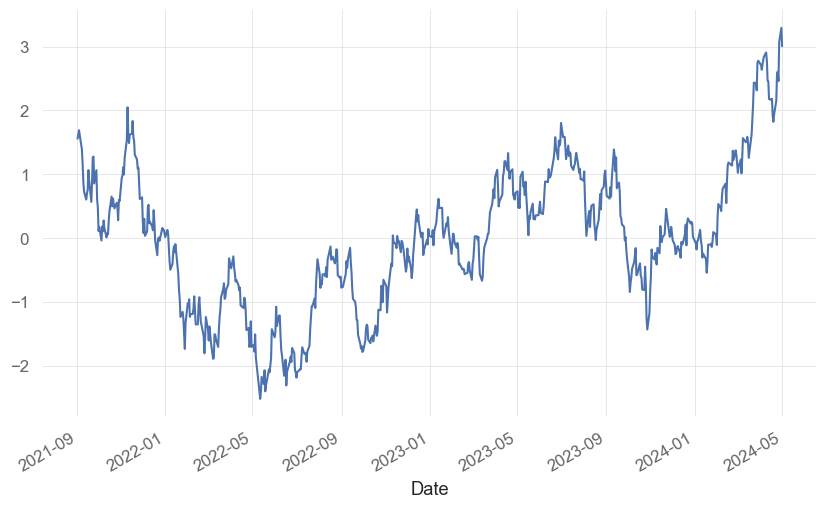

In [52]:
rolling = qs.stats.rolling_sharpe(dig_daily_rets['% Daily Returns'], rf = 0.05, rolling_period = 126).dropna()
rolling.plot()

qs.stats.sharpe(dig_daily_rets['% Daily Returns'], rf = 0.05)

In [53]:
#qs.reports.html(dig_daily_rets['Growth of $100'])

In [54]:
dig_daily_eq.set_index('Date', inplace = True)
dig_daily_eq_p = dig_daily_eq.drop(columns = {'Total Equity $'})

### Let's look at the historical daily weightings, we notice that our highest allocations historically are *SCHG*, *RSP*, and *VOO*. 

    I believe this is a beneficial chart to look at when determining some of the characteristics of the portfolio and how we allocate to certain holdings. From here we will go more in depth on the portfolio and its performance on a weighted measurement.

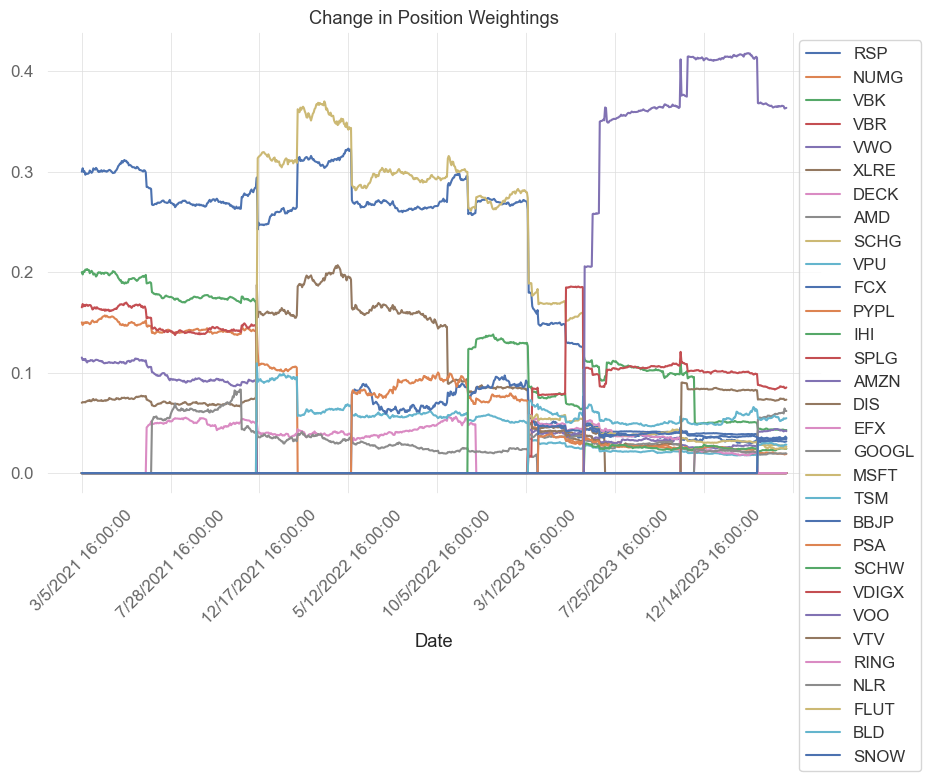

In [55]:
dig_daily_eq_p.plot(kind='line')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper center',bbox_to_anchor=(1.05, 1), ncol=1)
plt.title('Change in Position Weightings')
plt.show()

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(-100.0, 0, '12/6/2023 16:00:00'),
  Text(0.0, 0, '3/5/2021 16:00:00'),
  Text(100.0, 0, '7/28/2021 16:00:00'),
  Text(200.0, 0, '12/17/2021 16:00:00'),
  Text(300.0, 0, '5/12/2022 16:00:00'),
  Text(400.0, 0, '10/5/2022 16:00:00'),
  Text(500.0, 0, '3/1/2023 16:00:00'),
  Text(600.0, 0, '7/25/2023 16:00:00'),
  Text(700.0, 0, '12/14/2023 16:00:00'),
  Text(800.0, 0, ''),
  Text(900.0, 0, '')])

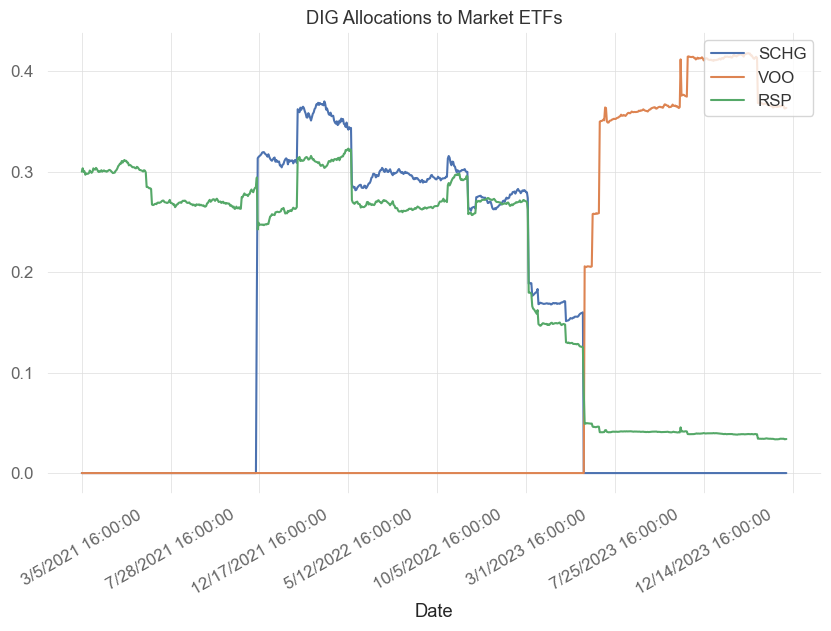

In [56]:
dig_daily_eq_p['SCHG'].plot(label = 'SCHG')
dig_daily_eq_p['VOO'].plot(label = 'VOO')
dig_daily_eq_p['RSP'].plot(label = 'RSP')
plt.title('DIG Allocations to Market ETFs')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30)

In [57]:
stocks_cumulative.set_index('Date', inplace = True)

In [58]:
stocks_cumulative = stocks_cumulative * 100
stocks_cumulative.tail()

,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,VPU,...,PSA,SCHW,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW
Date,,,,,,,,,,,,,,,,,,,,,
4/24/2024 16:00:00,3.230575,-0.378761,0.837287,1.41157,-0.382833,-2.105897,1.818483,3.65468,-4.175565,-0.35552,...,-0.158619,0.949033,0.804199,6.573719,1.197919,0.00815,0.144912,-0.421587,-0.140477,-0.129812
4/25/2024 16:00:00,3.223430,-0.378761,0.837287,1.41157,-0.382833,-2.105897,1.818483,3.65468,-4.175565,-0.35552,...,-0.183808,0.939227,0.804199,6.422787,1.186702,0.00815,0.160761,-0.445937,-0.119500,-0.184867
4/26/2024 16:00:00,3.225088,-0.378761,0.837287,1.41157,-0.382833,-2.105897,1.818483,3.65468,-4.175565,-0.35552,...,-0.190620,0.942460,0.804199,6.785980,1.182560,0.00815,0.183477,-0.420301,-0.006294,-0.055793
4/29/2024 16:00:00,3.248607,-0.378761,0.837287,1.41157,-0.382833,-2.105897,1.818483,3.65468,-4.175565,-0.35552,...,-0.152536,0.928690,0.817598,6.912700,1.210691,0.00815,0.220493,-0.435261,0.042949,-0.070945
4/30/2024 16:00:00,3.199719,-0.378761,0.837287,1.41157,-0.382833,-2.105897,1.818483,3.65468,-4.175565,-0.35552,...,-0.177605,0.908875,0.747887,6.338162,1.117073,0.00815,0.157089,-0.450474,-0.021565,-0.120467


In [59]:
stocks_cumulative['DIS']

Date
3/5/2021 16:00:00     0.00000
3/8/2021 16:00:00     0.00000
3/9/2021 16:00:00     0.00000
3/10/2021 16:00:00    0.00000
3/11/2021 16:00:00    0.00000
                       ...   
4/24/2024 16:00:00   -0.45637
4/25/2024 16:00:00   -0.45637
4/26/2024 16:00:00   -0.45637
4/29/2024 16:00:00   -0.45637
4/30/2024 16:00:00   -0.45637
Name: DIS, Length: 794, dtype: float64

## 6. Now that we have a cumulative representation of each holding's historical weighted return, we can analyze the biggest losers and winners of the DIG portfolio. 

Text(0, 0.5, '% Return')

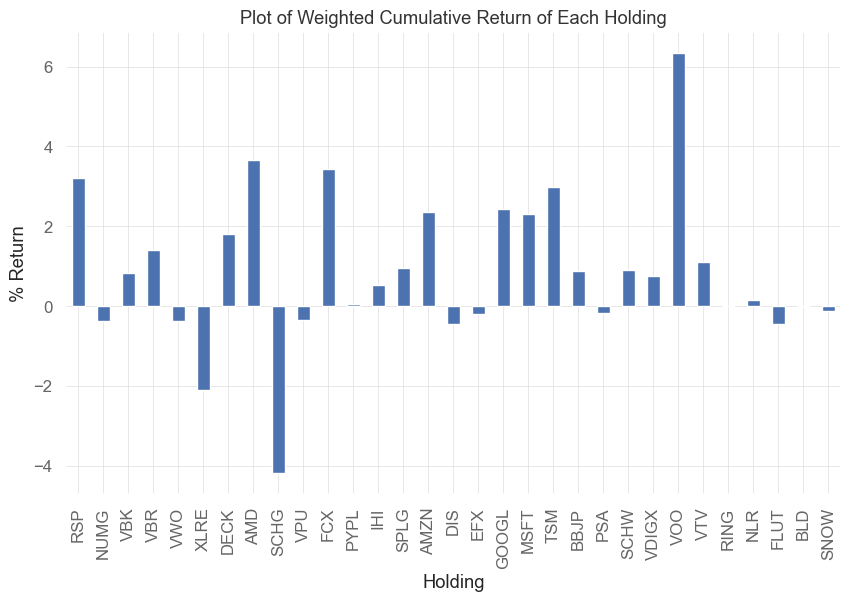

In [59]:
stocks_cumulative.iloc[-1].plot(kind = 'bar')
plt.title('Plot of Weighted Cumulative Return of Each Holding')
plt.xlabel('Holding')
plt.ylabel('% Return')

    We see that the lowest returning holdings cumulatively are SCHG and XLRE, we look more into this in a few sections. Some questions to ask are why did these perform so badly during the time we held them? Why didn't we exit the positions sooner if they were dragging our portfolio down at such a high level?

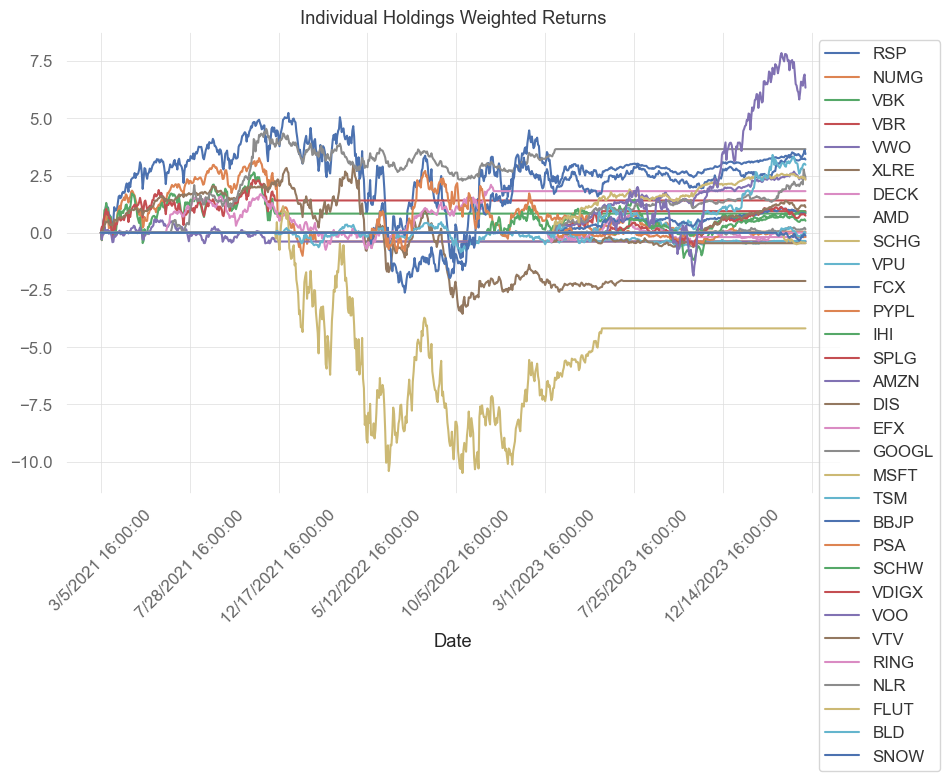

In [60]:
stocks_cumulative.plot(kind = 'line')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper center',bbox_to_anchor=(1.05, 1), ncol=1)
plt.title('Individual Holdings Weighted Returns')
plt.show()

### What do I mean by Weighted Returns? Well formally the weighted returns of a stock within a portfolio in a single day can be defined as 
$$ WR_i = \omega_{i} * r_i$$ 
Where $\omega_{i}$ is equal to the weighting of a stock on the previous day and $r_i$ is the stocks return in that day from market open to market close.

In a portfolio sense, the cumulative weighted return at time $N$ can be defined as 
$$WR_N = \sum_{i=1}^{N} \omega_{i} *r_{i}$$  

Where $i \in (0,..,N)$ and the return of day 0 ($r_0$) is 0.
    
We see from the above chart that essentially over the entire lifetime we held SCHG, it had negative weighted returns on the portfolio, the question begs why did we hold?

Text(0.5, 1.0, "DIG's Lowest Returning Holdings")

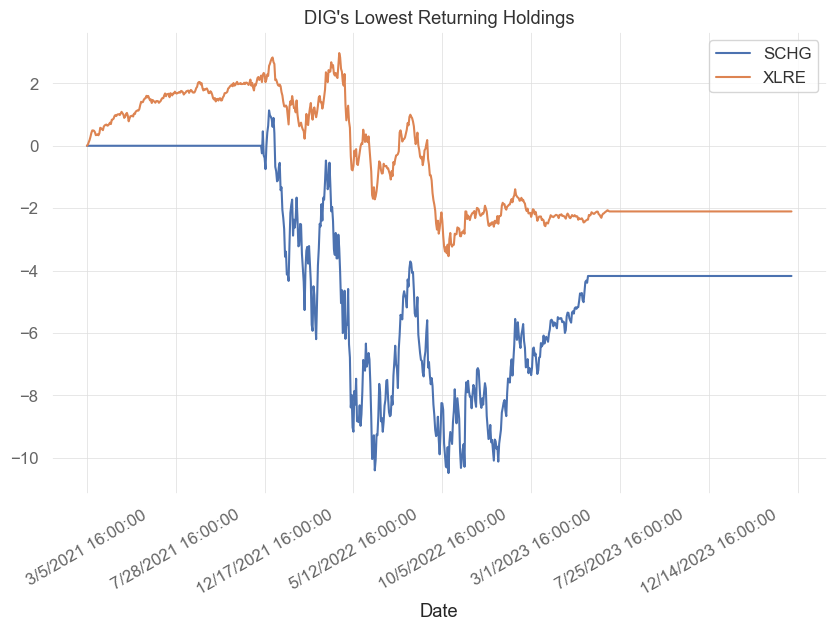

In [61]:
stocks_cumulative['SCHG'].plot(label = 'SCHG')
stocks_cumulative['XLRE'].plot(label = 'XLRE')
plt.legend()
plt.xticks(rotation = 30)
plt.title("DIG's Lowest Returning Holdings")

## Above, we isolated the weights and weighted returns of each holding on a daily basis for the DIG portfolio. We recall earlier in the project that the 5 year rolling Sharpe Ratio chart of DIG experienced a drastic decline in mean returns, which ties to the price return chart seen in earlier parts of the project. 

    I want to isloate the weighted returns for this period of drawdown of the portfolio to see what exactly was underperforming. In that time I anticipate that SCHG and XLRE are the holdings that held the portfolio back. But this is a good analysis to see the point which may have set the DIG portfolio off track of it's performance relative to the S&P 500. 

In [62]:
# Isolate Holdings 
full_data

# we see the down trending period of the mean returns is from 12/15/21 to 10/21/2022
# we choose these dates as this is a consistent down turn, after 10.21.22 the mean returns actually increase
# by about 1%, now we access the stocks cumulative performances and their weights


down_s = stocks_cumulative.loc['12/15/2021 16:00:00':'10/21/2022 16:00:00']
down_w = dig_daily_eq_p.loc['12/15/2021 16:00:00':'10/21/2022 16:00:00']

zeros = down_w.columns[(down_w == 0).all()]

for i in zeros:
    down_w = down_w.drop(columns = {i})
    down_s = down_s.drop(columns = {i})


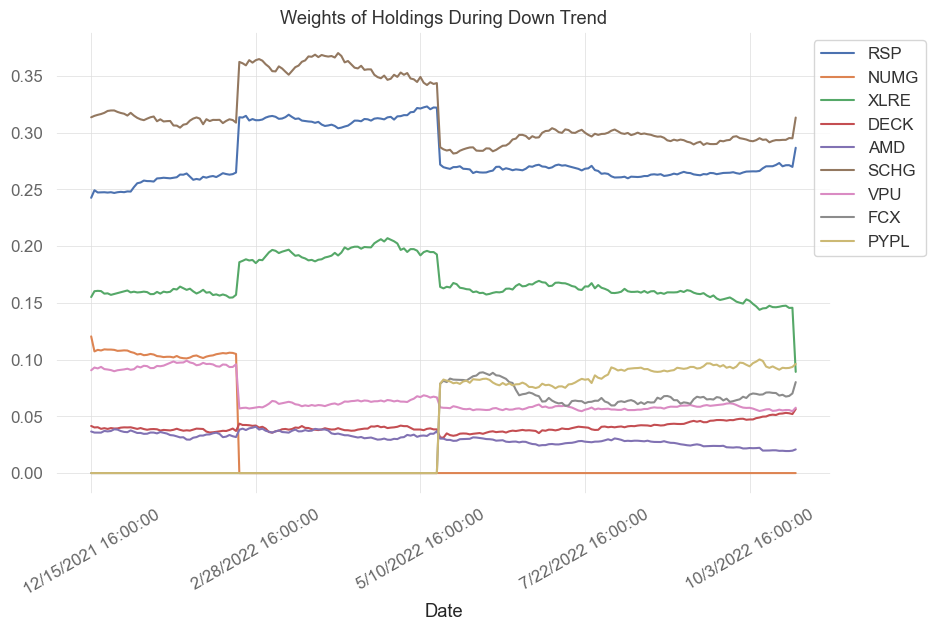

In [63]:
down_w.plot(kind = 'line')
plt.xticks(rotation = 30)
plt.legend(loc = 'upper center',bbox_to_anchor=(1.05, 1), ncol=1)
plt.title('Weights of Holdings During Down Trend')
plt.show()

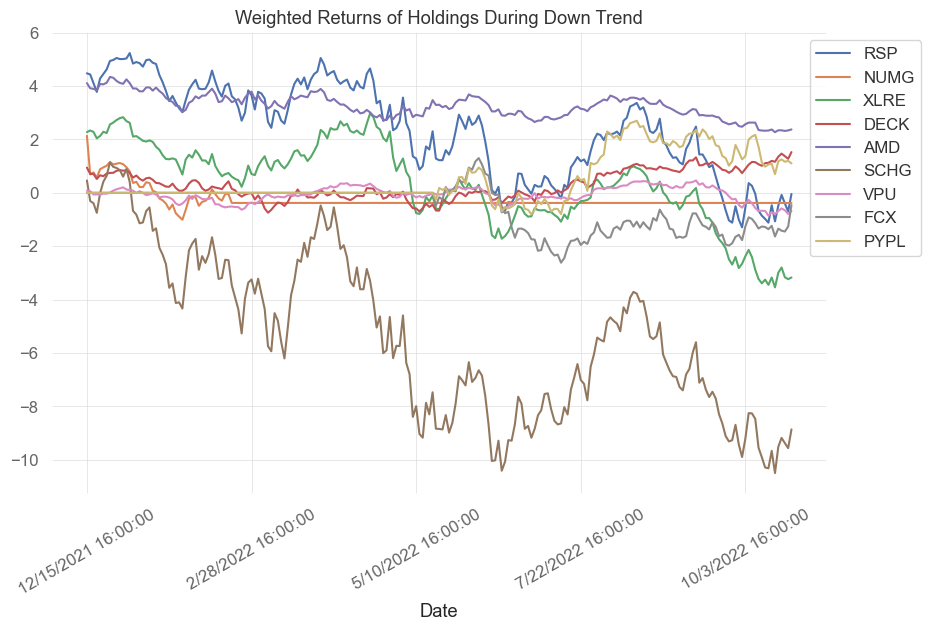

In [64]:
down_s.plot(kind = 'line')
plt.xticks(rotation = 30)
plt.legend(loc = 'upper center',bbox_to_anchor=(1.05, 1), ncol=1)
plt.title('Weighted Returns of Holdings During Down Trend')
plt.show()

In [65]:
print("Total DIG Weighted Return:", down_s.iloc[-1].sum())

Total DIG Weighted Return: -8.597924060690001


    From the above charts you can see where the impact of SCHG's returns on the return of the portfolio, with SCHG as such a high allocation within our portfolio, ~30% of our equities, and the downtrend hitting a 10% loss during this time period we can see this relation to the mean returns of the portfolio analysis in part 1. We conclude that on a weighted basis, the downtrend of our returns can be attributed to the SCHG holding.

## 7. Linear Regression to find Correlation between DIG and S&P 500
### For the metrics of Sharpe Ratio, Returns, and Standard Deviation

This section hopes to answer the question of whether our changes in the Sharpe Ratio are because of the decisions we are making or because of the Market itself driving our portfolio. This question arises due to our historical high allocation to market tracking index funds. 

In [66]:
import scipy.stats as sp

In [67]:
R = np.corrcoef(SPvsDIG['DIG'], SPvsDIG['SP 500'])
R

array([[1.        , 0.44357356],
       [0.44357356, 1.        ]])

In [68]:
sp.pearsonr(SPvsDIG['DIG'], SPvsDIG['SP 500'])

(0.4435735633285265, 0.005280527644035348)

In [69]:
lin_reg = sp.linregress(SPvsDIG['DIG'], SPvsDIG['SP 500'])
print(lin_reg, (lin_reg.rvalue)**2)

LinregressResult(slope=0.4067958113948872, intercept=0.567564746428072, rvalue=0.4435735633285266, pvalue=0.00528052764403533, stderr=0.1369881199821077, intercept_stderr=0.5117624589116162) 0.1967575060839664


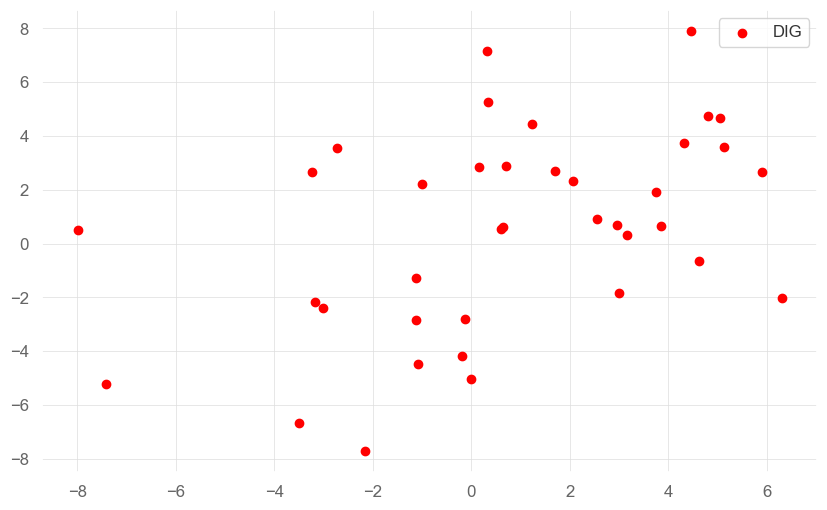

In [70]:
#plt.scatter(SPvsDIG.index, SPvsDIG['SP 500'], color='blue', label='S&P')
plt.scatter(SPvsDIG['SP 500'], SPvsDIG['DIG'], color = 'red', label ='DIG')
plt.plot()
plt.legend()

In [71]:
lin_reg.pvalue

0.00528052764403533

## 8. This portion of the file is dedicated to calculating the rolling annualized Sharpe Ratio of the DIG Portfolio as well as the S&P 500 
We're going to begin by finding the 6 month Rolling Sharpe Ratio of the DIG portfolio versus the S&P 500 to assess the consistency of our risk adjusted returns.

In [72]:
SP500D = pd.read_csv('SP500D.csv')
SP500D['DATE'] = pd.to_datetime(SP500D['DATE']).dt.strftime('%m-%d-%Y 16:%M:%S')
SP500D.rename(columns = {'DATE':'Date',
                       'SP500_PCH' : 'SP Daily Returns'}, inplace = True)
SP500D.set_index('Date', inplace = True)

In [73]:
# Daily weighted returns of the equities, we need to add in the daily returns of the S&P 500 

DIG_SP_Daily = dig_daily_rets.drop(columns = {'Cumulative Returns', 'Growth of $100'})
DIG_SP_Daily = DIG_SP_Daily*100

In [74]:
SP500D.head()

,SP Daily Returns
Date,
03-05-2021 16:00:00,1.9496
03-08-2021 16:00:00,-0.53593
03-09-2021 16:00:00,1.41547
03-10-2021 16:00:00,0.60303
03-11-2021 16:00:00,1.03955


In [75]:
SP500D.index = pd.to_datetime(SP500D.index)
DIG_SP_Daily = pd.merge(DIG_SP_Daily, SP500D, left_index=True, right_index=True, how='inner')
DIG_SP_Daily['SP Daily Returns'] = pd.to_numeric(DIG_SP_Daily['SP Daily Returns'], errors='coerce').fillna(0)

In [76]:
DIG_SP_Daily.iloc[0,-1]= 0

In [77]:
DIG_SP_Daily.tail()

,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,VPU,...,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW,% Daily Returns,SP Daily Returns
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-24 16:00:00,0.004833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011303,-0.026723,0.005134,0.0,-0.009804,0.012447,-0.046922,0.087697,0.010652,0.02130
2024-04-25 16:00:00,-0.007145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.150932,-0.011217,0.0,0.015849,-0.024349,0.020977,-0.055055,-0.343442,-0.45764
2024-04-26 16:00:00,0.001659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.363193,-0.004143,0.0,0.022716,0.025635,0.113205,0.129074,1.692426,1.02091
2024-04-29 16:00:00,0.023519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013399,0.126720,0.028132,0.0,0.037015,-0.014960,0.049243,-0.015151,0.266061,0.31785
2024-04-30 16:00:00,-0.048888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.069711,-0.574538,-0.093619,0.0,-0.063404,-0.015213,-0.064514,-0.049522,-1.667737,-1.57000


Text(0.5, 1.0, 'Terms of Equities DIG vs S&P500')

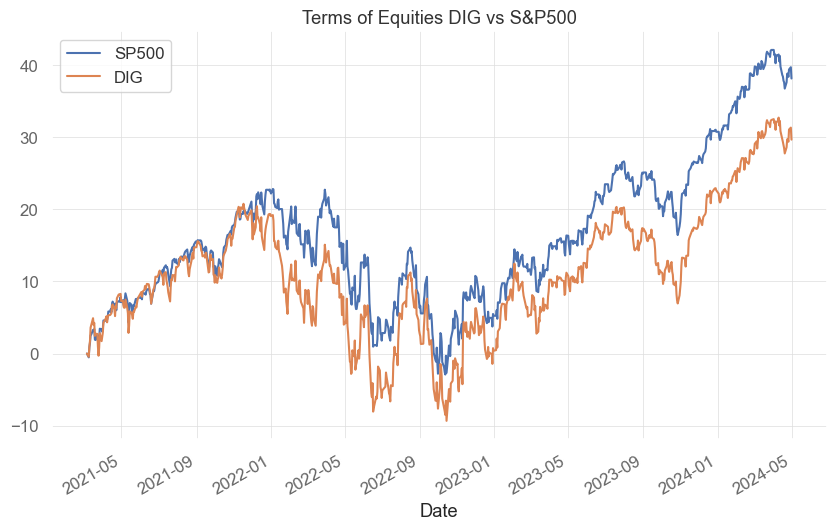

In [78]:
DIG_SP_Daily.iloc[:,-1].cumsum().plot(label = 'SP500')
DIG_SP_Daily.iloc[:,-2].cumsum().plot(label = 'DIG')
plt.legend()
plt.title('Terms of Equities DIG vs S&P500')

In [79]:
# For this we are going to use the rolling window method 
rolling_window = 126 # 252 trading days in a year, 126 in 6 months
rfr = weights['Rate'].mean()/100

rs_DIG = ((DIG_SP_Daily['% Daily Returns'].rolling(window = rolling_window).mean() - rfr/2) / 
          (DIG_SP_Daily['% Daily Returns'].rolling(window = rolling_window).std())).fillna(0)

rs_SP = ((DIG_SP_Daily['SP Daily Returns'].rolling(window = rolling_window).mean() - rfr/2) / 
          (DIG_SP_Daily['SP Daily Returns'].rolling(window = rolling_window).std())).fillna(0)
rfr

0.03367272727272727

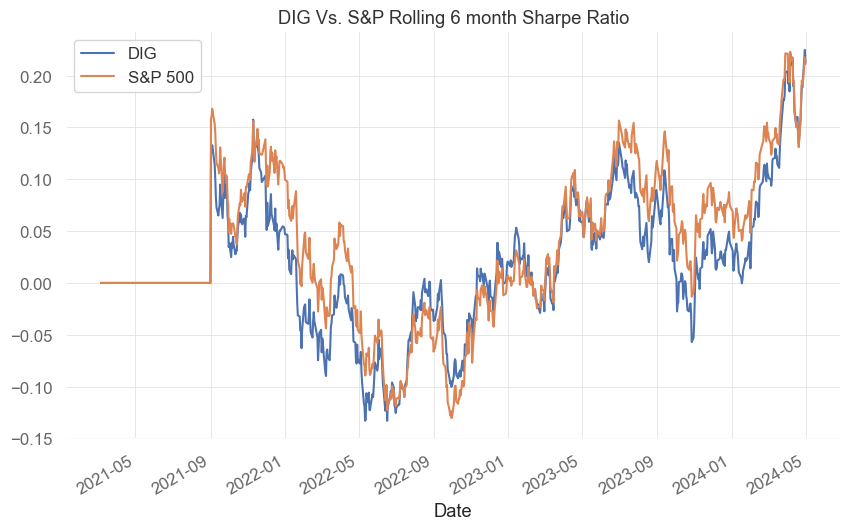

In [80]:
rs_DIG.plot(label = 'DIG')
rs_SP.plot(label = 'S&P 500')
plt.title('DIG Vs. S&P Rolling 6 month Sharpe Ratio')

plt.legend()

In [81]:
print("DIG Sharpe stdev:", rs_DIG.std(), "SP500 Sharpe stdev:" ,rs_SP.std())

DIG Sharpe stdev: 0.065358724483763 SP500 Sharpe stdev: 0.07322868954113435


Text(0.5, 0, '% Return')

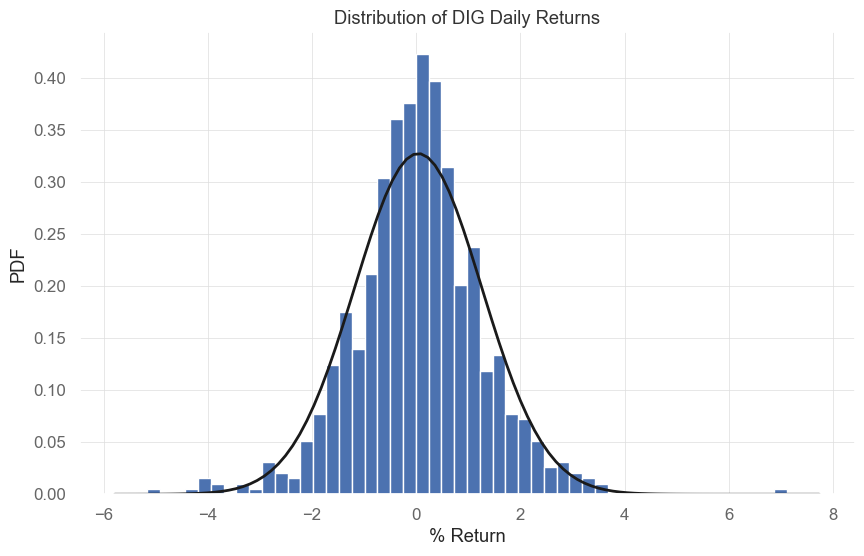

In [82]:
DIG_SP_Daily['% Daily Returns'].hist(bins=50, density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sp.norm.pdf(x,DIG_SP_Daily['% Daily Returns'].mean() , DIG_SP_Daily['% Daily Returns'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of DIG Daily Returns')
plt.ylabel('PDF')
plt.xlabel('% Return')
# try student t, try log

## In this section we are going to re-run an iteration of the phase 1 code, but using the daily weights instead of the purchase history weights

In [83]:
rates_daily = rates
rates_daily.set_index('Date', inplace = True)

In [84]:
rates_daily.head()
rates_daily = rates_daily.apply(pd.to_numeric, errors='coerce')
rates_daily = rates_daily.fillna(method = 'ffill')

In [85]:
def get_daily_sharpes(weights,log_returns, rates_daily , rf_rate = None):
    #weight_raw = weights.drop(columns = {'Date', 'Rate'}) # this is our raw weighting 
    weights.index = pd.to_datetime(weights.index)
    weights.index = weights.index.strftime('%m/%d/%Y')
    weight_raw = weights
    tickers = weights.columns.tolist()
    #tickers = tickers[1:-1]
    sharpes = []
    rets = []
    risks = []
    for i in weights.index:
        if rf_rate == None:
            rf_rate = rates_daily.at[i, 'DTB3']/100
        else: 
            rf_rate = rf_rate
            
        #end_date = dt.datetime.strptime(weights.index[i], "%m/%d/%Y")
        end_date = i
        #start_date = end_date - dt.timedelta(days=365 * 5)
        start_date = pd.to_datetime(i) - dt.timedelta(days=365 * 5)
    
        log_rets = log_returns[(pd.to_datetime(log_returns['Date']) >= start_date) & 
                               (pd.to_datetime(log_returns['Date']) <= end_date)]


        mean_rets = log_rets.mean(numeric_only = True, skipna = True)
        cov_mat = log_rets.cov() * 252
        port_rets = ((weight_raw.loc[i]* mean_rets).sum()+1)**252 - 1
        port_risk = np.sqrt(np.dot(weight_raw.loc[i].T, np.dot(cov_mat, weight_raw.loc[i])))
        
        # what the port_risk line does is that it takes cov_mat and weight_raw.iloc[i] and multiples each line of 
        # cov_mat with weight_raw.iloc[i] and sums it and then returns a vector with equal number of rows as matrix
        # this result vector is each volatility of the holding, to get this to a single value for the portfolio 
        # we must take the dot prod of this result with the transposed weighting vector. This gives the volatility
        # for the portfolio, so the square root yields the stdev

        sharpes.append((port_rets - rf_rate) / port_risk)
        rets.append(port_rets)
        risks.append(port_risk)
    
    complete = pd.DataFrame({'Log Returns' : rets,
                            'Standard Deviation': risks,
                            'Sharpe Ratio': sharpes}, 
                           index = weights.index)
    
    return complete
    

In [86]:
daily_5yr = get_daily_sharpes(dig_daily_eq_p, log_returns, rates_daily)

In [87]:
daily_5yr.head()

,Log Returns,Standard Deviation,Sharpe Ratio
Date,,,
03/05/2021,0.145946,0.196417,0.741006
03/08/2021,0.148182,0.196493,0.752099
03/09/2021,0.150678,0.196455,0.764948
03/10/2021,0.152928,0.196560,0.775985
03/11/2021,0.153346,0.196512,0.778303


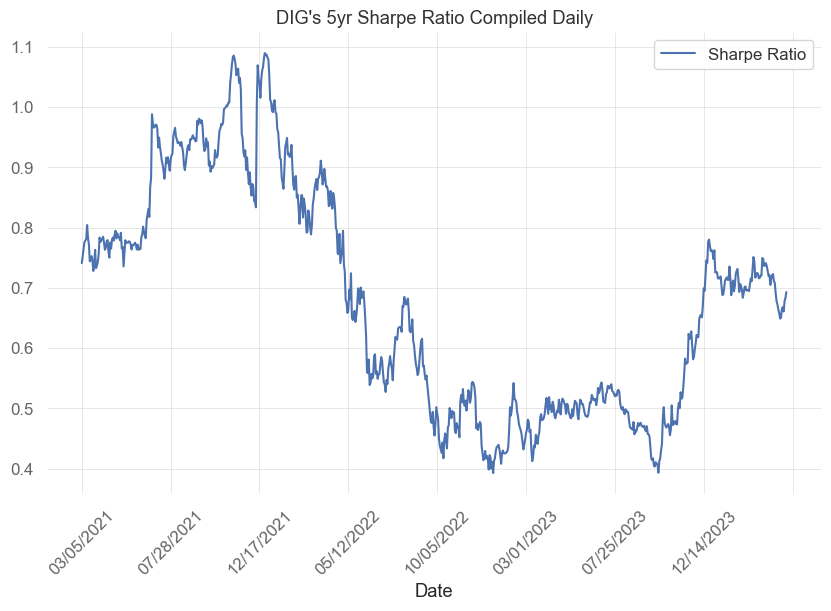

In [88]:
daily_5yr['Sharpe Ratio'].plot()
plt.xticks(rotation = 45)
plt.title("DIG's 5yr Sharpe Ratio Compiled Daily")
plt.legend()

In [89]:
full_data2 = full_data

In [90]:
full_data2.set_index('Date', inplace = True)

In [91]:
full_data2

,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
Date,,,
03/05/2021,0.145946,0.196417,0.741006
03/25/2021,0.146213,0.196744,0.741126
05/20/2021,0.153941,0.197542,0.777257
06/18/2021,0.162415,0.199403,0.812500
06/28/2021,0.202089,0.204128,0.988048
11/18/2021,0.195009,0.203704,0.955349
12/14/2021,0.194581,0.192897,1.006659
12/15/2021,0.208007,0.194141,1.069366
02/18/2022,0.172385,0.201249,0.854588


In [92]:
daily_and_purch = daily_5yr.join(full_data2, lsuffix='_df1', rsuffix='_df2')

In [93]:
daily_and_purch = daily_and_purch.interpolate(method = 'linear')

In [94]:
daily_and_purch.head()

,Log Returns,Standard Deviation,Sharpe Ratio,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
Date,,,,,,
03/05/2021,0.145946,0.196417,0.741006,0.145946,0.196417,0.741006
03/08/2021,0.148182,0.196493,0.752099,0.145965,0.196440,0.741015
03/09/2021,0.150678,0.196455,0.764948,0.145984,0.196463,0.741023
03/10/2021,0.152928,0.196560,0.775985,0.146003,0.196487,0.741032
03/11/2021,0.153346,0.196512,0.778303,0.146022,0.196510,0.741041


Text(0.5, 1.0, 'Daily Compiling of 5yr Sharpe Ratio vs Purchase History Compilation')

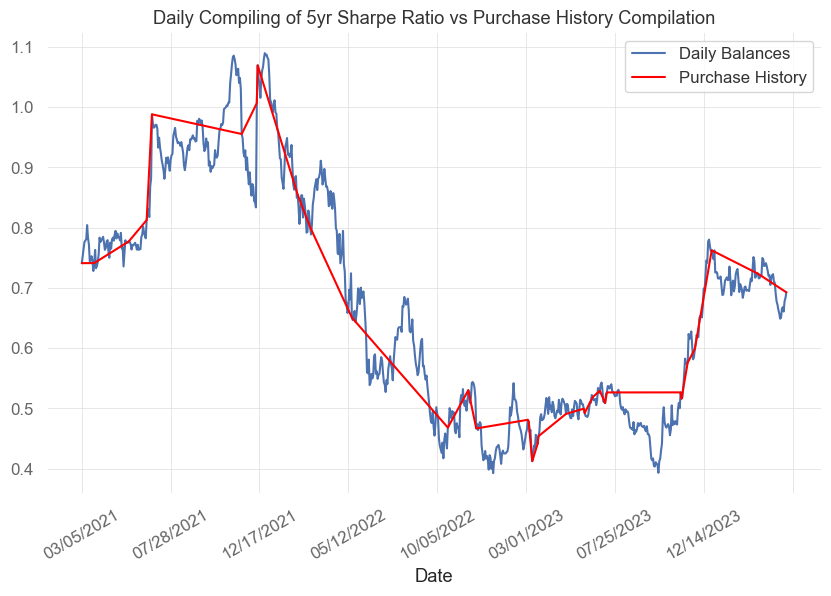

In [95]:
daily_and_purch['Sharpe Ratio'].plot(label = 'Daily Balances')
daily_and_purch['5yr Historical Sharpe Ratio'].plot(label = 'Purchase History', color = 'red')
plt.xticks(rotation = 30)
plt.legend()
plt.title('Daily Compiling of 5yr Sharpe Ratio vs Purchase History Compilation')

## Essentially this is proof that our 5 yr iteration in phase 1 was somewhat representative of the daily breakdown of our 5yr Sharpe Ratio

Text(0.5, 1.0, 'Daily Compiling of 5yr Log Returns Ratio vs Purchase History Compilation')

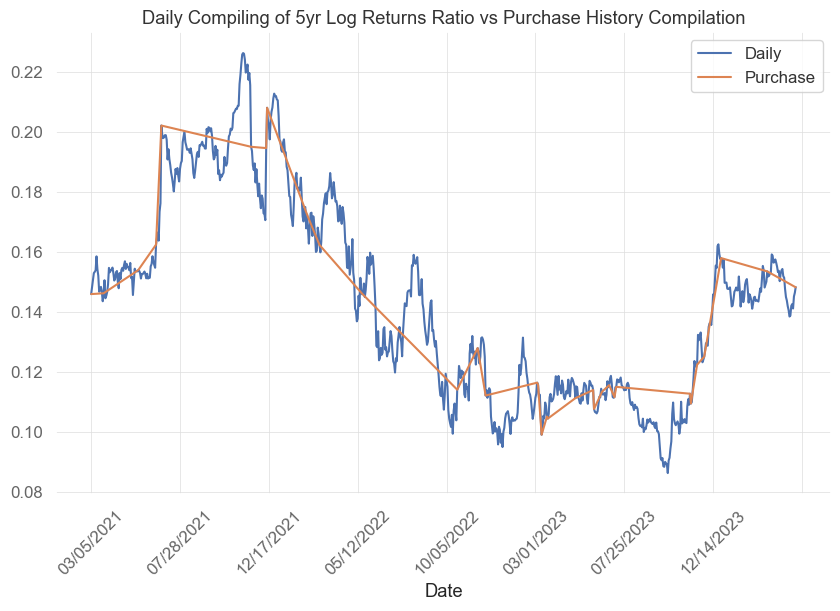

In [96]:
daily_and_purch['Log Returns'].plot(label = 'Daily')
daily_and_purch['5yr Log Returns'].plot(label = 'Purchase')
plt.xticks(rotation = 45)
plt.legend()
plt.title('Daily Compiling of 5yr Log Returns Ratio vs Purchase History Compilation')

Text(0.5, 1.0, 'Daily Compiling of 5yr Standard Deviation Ratio vs Purchase History Compilation')

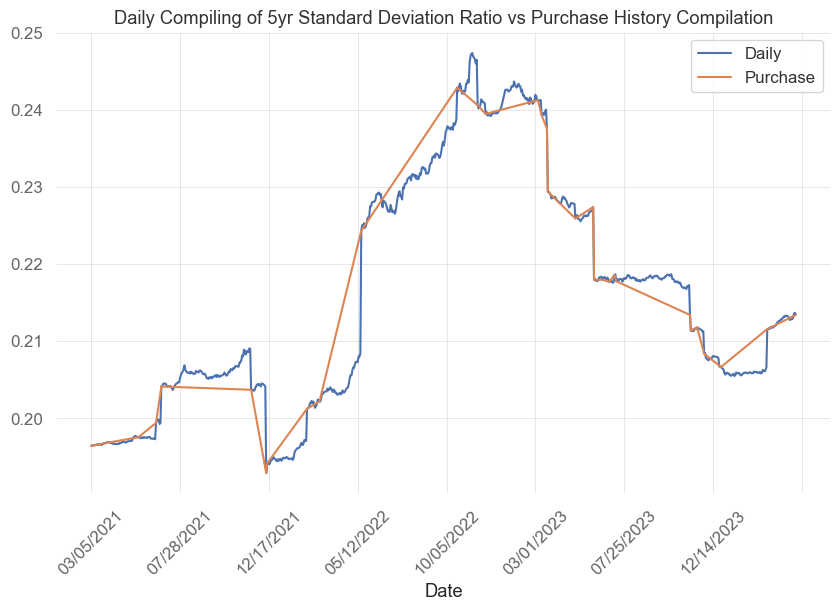

In [97]:
daily_and_purch['Standard Deviation'].plot(label = 'Daily')
daily_and_purch['5yr Standard Deviation'].plot(label = 'Purchase')
plt.xticks(rotation = 45)
plt.legend()
plt.title('Daily Compiling of 5yr Standard Deviation Ratio vs Purchase History Compilation')

In [98]:
DIG_SP_Daily.to_csv('dig_sp_daily.csv')

In [99]:
DIG_SP_Daily['% Daily Returns'].sum()

29.696217270266228

In [100]:
one_year = SPvsDIG['05/01/2023':'04/01/2024']

In [101]:
digs = (one_year['DIG'].mean()*12-0.05)/(one_year['DIG'].std()*np.sqrt(12))
sp = (one_year['SP 500'].mean()*12-0.05)/(one_year['SP 500'].std()*np.sqrt(12))
print("DIG:", digs, "SP:", sp)

DIG: 1.1138147500876354 SP: 2.225730455620581


### We've had yet another breakthrough in the data, the weighted returns of our cash and fixed income positions

In [102]:
total_cumul = pd.read_csv('total_cumul.csv')
total_cumul['Date'] = pd.to_datetime(total_cumul['Date']).dt.strftime('%Y-%m-%d 16:%M:%S')

In [103]:
total_cumul.set_index('Date', inplace = True)

In [104]:
total_cumul['Total'] = total_cumul.sum(axis = 1)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(-100.0, 0, '2023-12-06 16:00:00'),
  Text(0.0, 0, '2021-03-05 16:00:00'),
  Text(100.0, 0, '2021-07-28 16:00:00'),
  Text(200.0, 0, '2021-12-17 16:00:00'),
  Text(300.0, 0, '2022-05-12 16:00:00'),
  Text(400.0, 0, '2022-10-05 16:00:00'),
  Text(500.0, 0, '2023-03-01 16:00:00'),
  Text(600.0, 0, '2023-07-25 16:00:00'),
  Text(700.0, 0, '2023-12-14 16:00:00'),
  Text(800.0, 0, ''),
  Text(900.0, 0, '')])

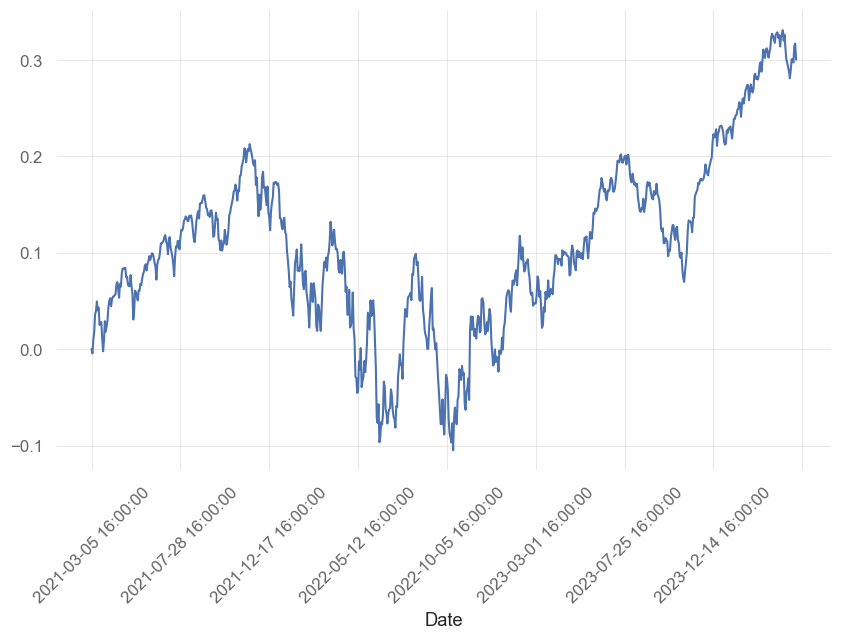

In [105]:
#DIG_SP_Daily.iloc[:,-1].cumsum().plot(label = 'SP500')
total_cumul['Total'].plot()
plt.xticks(rotation = 45)

In [106]:
total=pd.DataFrame({'DIG':total_cumul['Total']*100})
sp = pd.DataFrame({'SP':DIG_SP_Daily.iloc[:,-1]})

In [107]:
total['SP'] = sp['SP']

In [108]:
total

,DIG,SP
Date,,
2021-03-05 16:00:00,0.000000,0.00000
2021-03-08 16:00:00,-0.442042,-0.53593
2021-03-09 16:00:00,0.964612,1.41547
2021-03-10 16:00:00,1.770843,0.60303
2021-03-11 16:00:00,3.622089,1.03955
...,...,...
2024-04-24 16:00:00,30.061613,0.02130
2024-04-25 16:00:00,29.718596,-0.45764
2024-04-26 16:00:00,31.411441,1.02091


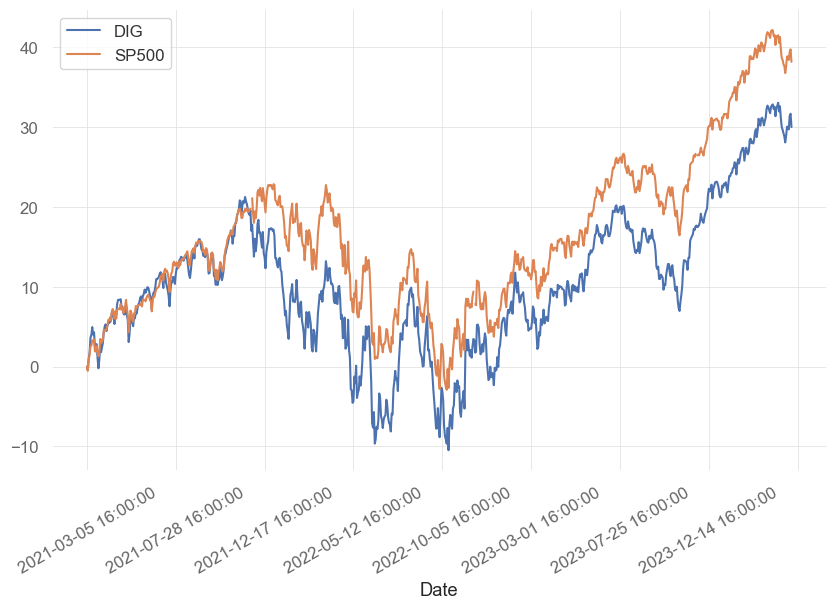

In [109]:
total['DIG'].plot(label = 'DIG')
total['SP'].cumsum().plot(label = 'SP500')
plt.xticks(rotation = 30)
plt.legend()